###  Exploratory Data Anaysis for Stock News

#### Load libraries and dataset

In [1]:
# import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# add the 'scripts' directory to the path for module imports
sys.path.append(os.path.abspath(os.path.join('..','scripts')))

# load the dataset 
path = '../data/raw_analyst_ratings.csv'
df = pd.read_csv(path)

In [3]:
# explore the first 3 rows
df.head(3)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A


In [4]:
#explore the last three three rows 
df.tail(3)

,Unnamed: 0,headline,url,publisher,date,stock
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [5]:
#check the size ot the the dataset
df.shape

(1407328, 6)

In [6]:
#check missing values 
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [7]:
#check dupplicates 
print(f'Duplicate rows:')
df[df.duplicated].sum()

Duplicate rows:


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: object

In [8]:
# consise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [2]:
#convert 'date'column into datetime 
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True) 
df['date'].dtype

datetime64[ns, UTC]

### Descriptive Statistics


####  Summary statistics for Headline Length 

In [10]:
import descriptive_analysis as ds
print('Headline Lenght summary statistics is:')
print(ds.analyze_headline_length(df))

Headline Lenght summary statistics is:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


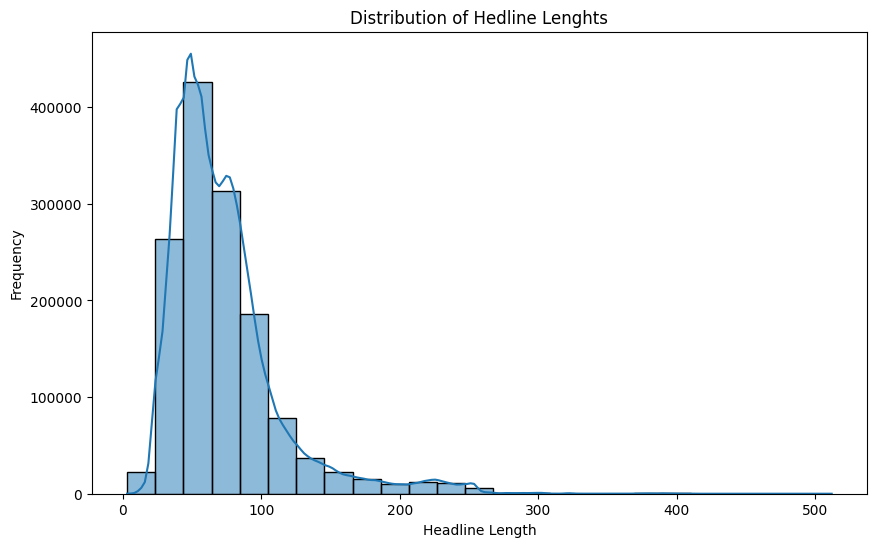

In [11]:
#plot the distrituion of headline lenghts 
plt.figure(figsize = (10,6))
sns.histplot(df['headline_length'],kde =True,bins= 25)
plt.title('Distribution of Hedline Lenghts')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

The headline length distribution shows:
- Right-skewed pattern
- Mode at 50-70 characters 
- Long right tail indicating fewer, longer headlines
- Majority of headlines are relatively short

#### Count the most active publishers

In [12]:
print("Top 10 Publishers:")
publisher_counts = ds.count_publisher_articles(df).reset_index(name="no_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top 10 Publishers:


,publisher,no_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


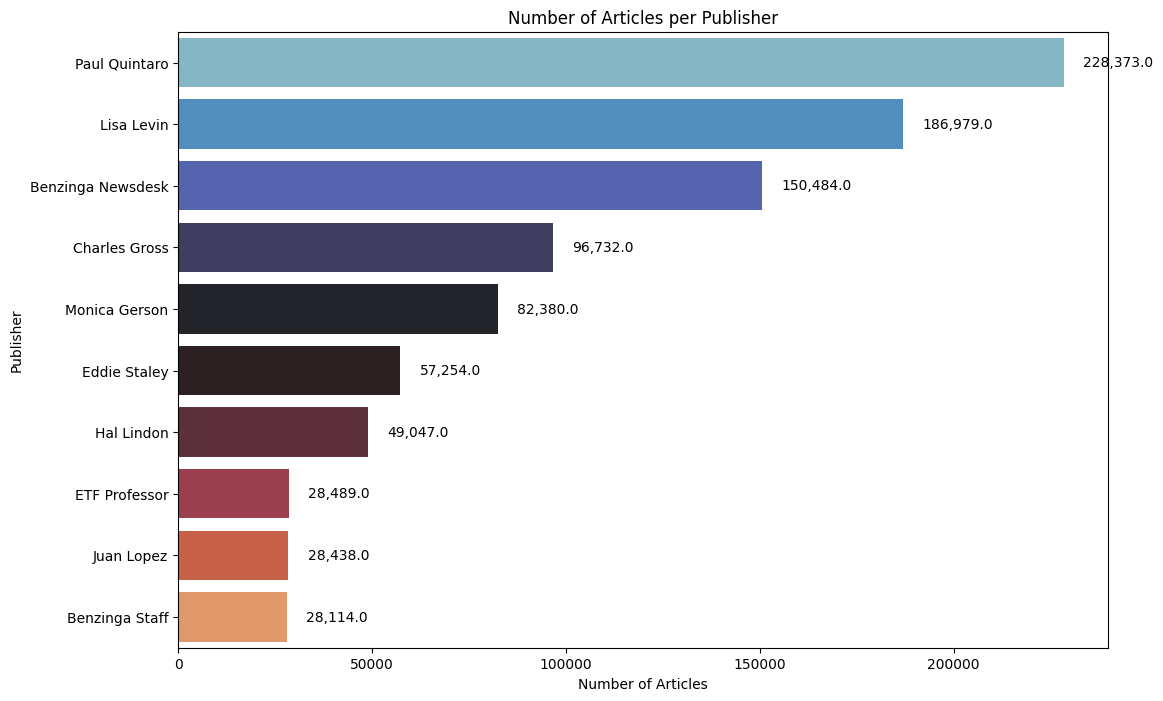

In [13]:
# Plot the number of articles per publisher
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='no_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette='icefire',
                   hue='publisher',
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    label = f'{width:,}'
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black', fontsize=10)

plt.title('Number of Articles per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

Summary of Most Active Publishers

- Paul Quintaro is the most active publisher with 228,373 articles.
- Lisa Levin follows with 186,978 articles.
- Benzinga Newsdesk has 150,484 articles, making it the third most active.
- Charles Gross and Monica Gerson are also highly active, with 96,732 and 82,380 articles, respectively.
- Eddie Staley, Hal Lindon, ETF Professor, Juan Lopez, and Benzinga Staff are notable contributors, each publishing between 28,114 and 57,254 articles.

#### Article by day of a week

In [14]:
# Articles by day of weeks
articles_by_day = ds.analyze_weekday_distribution(df).reset_index(name='no_of_articles')
articles_by_day

,date,no_of_articles
0,Thursday,12712
1,Wednesday,11873
2,Tuesday,11037
3,Monday,10297
4,Friday,9407
5,Sunday,388
6,Saturday,273


- **Thursday** is the peak day for publishing articles (**12,688 entries**).  
- **Wednesday** (**11,891 articles**) and **Tuesday** (**11,002 articles**) follow closely.  
- **Weekend activity drops sharply**:  
  - **Sunday**: 436 articles  
  - **Saturday**: 267 articles  
- **Clear trend**: Mid-week (**Tue-Thu**) sees the highest publishing activity.

#### Publisher Analysis


In [15]:
# identify unique emails
unique_domains = ds.analyze_domain_distribution(df)
unique_domains.reset_index(drop=True)

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


- **benzinga.com** dominates as the top news source:  
  - **7,937 articles** (significant majority)  
  - Indicates **major influence in stock news coverage**  

- **gmail.com** appears with moderate frequency:  
  - **139 occurrences**  
  - Likely represents **individual contributors** or **informal sources**

## Text Analysis(Topic Modeling):

In [16]:
# Import the module
from sentiment_analysis import SentimentAnalyzer

# Perform sentiment analysis on headline
sentiment_df = SentimentAnalyzer.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = SentimentAnalyzer.apply_sentiment_categories(sentiment_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# make the date as index and add stock column at the end
sentiment_df['Date'] = df['date'].dt.date
sentiment_df['stock'] = df['stock']
sentiment_df.set_index('Date', inplace=True)

In [18]:
# show results
sentiment_df.head()

,headline,neg,neu,pos,compound,sentiment,stock
Date,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.855,0.145,0.296,Positive,A


In [19]:
# check and display empty headlines
empty_headlines = sentiment_df[sentiment_df['headline'] == '']
print(f"Number of empty headlines: {len(empty_headlines)}")

Number of empty headlines: 0


In [20]:
#check the number of missing sentiments
missing_after_sentiment = sentiment_df[sentiment_df['headline'].isna()]
print(f"Number of missing headlines after sentiment analysis: {len(missing_after_sentiment)}")

Number of missing headlines after sentiment analysis: 0


In [21]:
# Find rows with NaN in cleaned_headline
# Check the data types in the 'headline' column
print(sentiment_df['headline'].apply(type).value_counts())

headline
<class 'str'>    1407328
Name: count, dtype: int64


In [22]:
# Save the sentiment analysis result into csv for correlation analysis
# with stock market movements
sentiment_df.to_csv('../data/sentiment.csv')

In [23]:
# Check distribution of sentiment labels
print(f'Percentage of sentiment level distribution {(sentiment_df["sentiment"].value_counts()/len(sentiment_df))*100} ')

Percentage of sentiment level distribution sentiment
Neutral     52.534448
Positive    31.473544
Negative    15.992008
Name: count, dtype: float64 


C:\Users\girma\AppData\Local\Temp\ipykernel_16104\4293585840.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sentiment_df["sentiment"], palette="coolwarm")


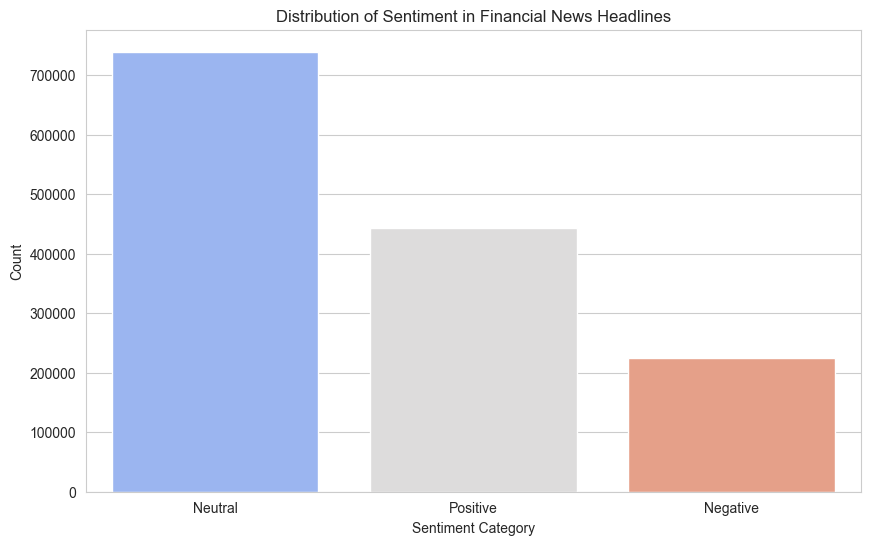

In [24]:
# Plot Sentiment Distribution
# Set style
sns.set_style("whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=sentiment_df["sentiment"], palette="coolwarm")

plt.title("Distribution of Sentiment in Financial News Headlines")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

- **Neutral headlines dominate (52.7%)**:  
  - Financial news primarily delivers factual/balanced reporting  
  - Suggests objective coverage without strong bias  

- **Positive sentiment substantial (31.4%)**:  
  - Reflects optimistic outlook in financial reporting  
  - Indicates frequent coverage of favorable market developments  

- **Negative sentiment less common (15.9%)**:  
  - Shows limited pessimistic or unfavorable news  
  - Potentially indicates stable market conditions  

**Key Insight**:  
Financial news skews neutral-to-positive, with:  
✓ Twice as many positive as negative headlines  
✓ Majority maintaining balanced tone  
✓ Possible reflection of current market optimism

#### **Identifying Common Keywords/Phrases**  

##### **1. Text Preprocessing**  
- Remove **punctuation** , **special characters**, and **numbers**  
- Convert text to **lowercase** for consistency  
- Filter out **stopwords** (e.g., "the," "and," "in")  
- Apply **lemmatization/stemming** to normalize words  

##### **2. Tokenization**  
- Split text into **individual words** (unigrams)  
- Optionally extract **key phrases** (n-grams like "stock market" or "interest rates")  

##### **3. Frequency Analysis**  
- Count occurrences of each word/phrase  
- Rank by **most frequent terms**  
- Visualize using **word clouds** or **bar charts**

In [25]:
sentiment_df.head()

,headline,neg,neu,pos,compound,sentiment,stock
Date,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.855,0.145,0.296,Positive,A


In [26]:
# consise summary of the sentiment dataframe
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407328 entries, 2020-06-05 to NaT
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   headline   1407328 non-null  object 
 1   neg        1407328 non-null  float64
 2   neu        1407328 non-null  float64
 3   pos        1407328 non-null  float64
 4   compound   1407328 non-null  float64
 5   sentiment  1407328 non-null  object 
 6   stock      1407328 non-null  object 
dtypes: float64(4), object(3)
memory usage: 118.1+ MB


# Analyze the most common keywords
```python 
SentimentAnalyzer.perform_nlp_analysis(sentiment_df['headline'])

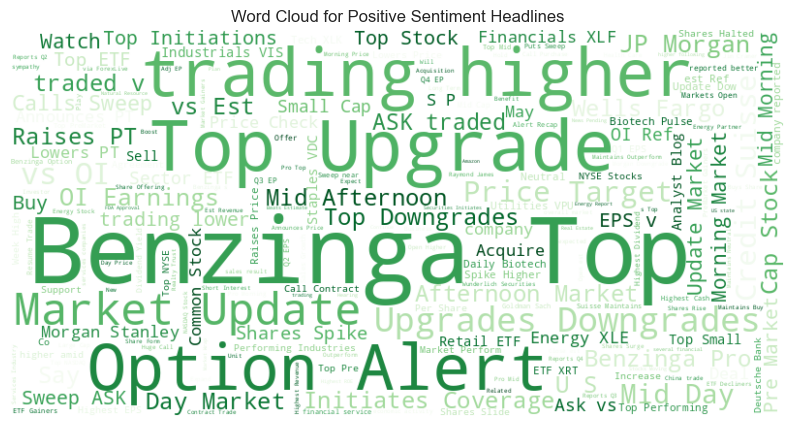

In [27]:
# Generate Word Cloud for positive headlines
positive_text = " ".join(sentiment_df[sentiment_df["sentiment"] == "Positive"]["headline"])
wordcloud = WordCloud(background_color="white", colormap="Greens", width=800, height=400).generate(positive_text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment Headlines")
plt.show()

### Time Series Analysis

#### Analzye annual or quartley trends

c:\Users\girma\OneDrive\Desktop\10 Academy\week-1\stock-price-move-with-news-sentiment-week-1\scripts\ts_analysis.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  annual_counts = data.groupby(data['date'].dt.to_period('Y')).size().reset_index(name='no_of_articles')
c:\Users\girma\OneDrive\Desktop\10 Academy\week-1\stock-price-move-with-news-sentiment-week-1\scripts\ts_analysis.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  quarterly_counts = data.groupby(data['date'].dt.to_period('Q')).size().reset_index(name='no_of_articles')


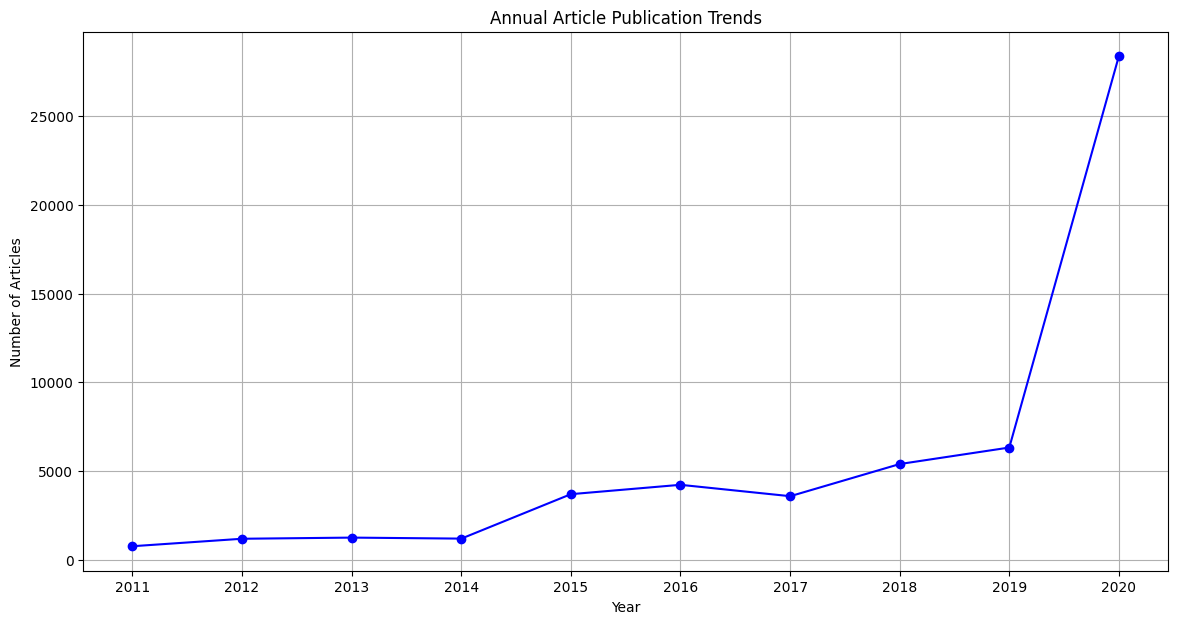

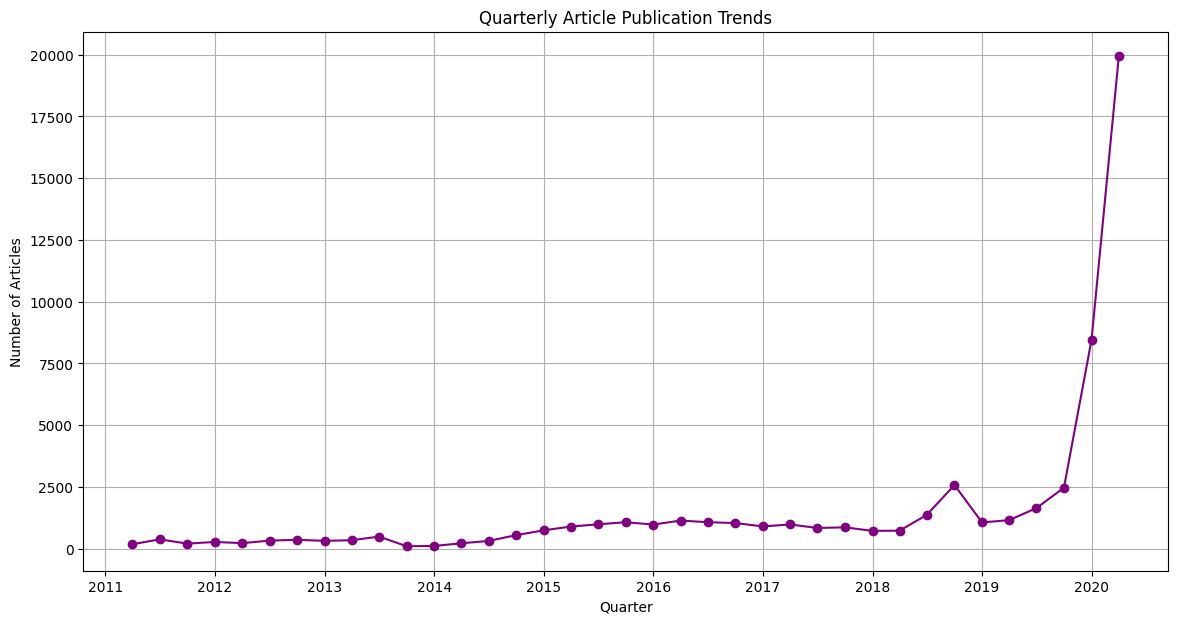

In [17]:
# Analyze annual and quarterly trends
from ts_analysis import *

annual_counts = analyze_annual_trends(df)
quarterly_counts = analyze_quarterly_trends(df)

# Plot the long-term trends
plot_long_term_trends(annual_counts, quarterly_counts)

- **2010–2020 Annual Trend**:  
  - **Significant growth** in article volume, especially during **2010–2012**  
  - **Peak activity** observed in mid-decade years  
  - **Decline in 2019–2020**, suggesting reduced output or external factors  

- **Key Observations**:  
  ✓ **Strong surge** in early years (2010–2012)  
  ✓ **Moderate fluctuations** through mid-decade  
  ✓ **Recent dip** (2019–2020) potentially reflecting market or editorial shifts  

- **Implications**:  
  - Early growth may align with **industry expansion**  
  - Recent decline could signal **market saturation** or **pandemic impact** (if data includes 2020) 

#### Decomposition

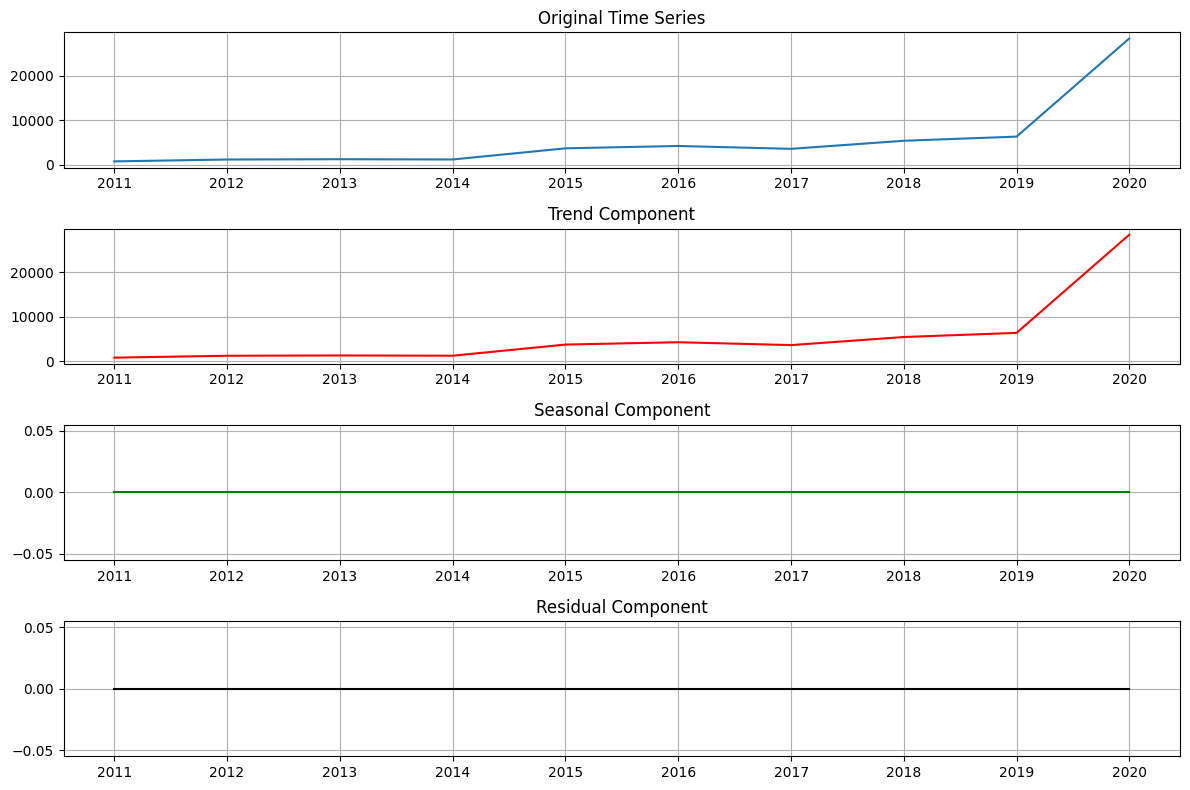


Summary Statistics:
Mean Trend: 5598.70
Mean Seasonal: 0.00
Mean Residual: 0.00


In [19]:
# Decompose the time series to understand trends and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose


# Set date as index for decomposition
annual_counts.set_index('date', inplace=True)

# Decompose - since this is annual data, we use period=1 (no seasonality)
decomposed = seasonal_decompose(annual_counts['no_of_articles'], 
                               model='additive', 
                               period=1)  # period=1 for annual data

# Create the plot
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(4, 1, 1)
plt.plot(annual_counts.index, annual_counts['no_of_articles'], label='Original')
plt.title('Original Time Series')
plt.grid(True)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(annual_counts.index, decomposed.trend, 'r', label='Trend')
plt.title('Trend Component')
plt.grid(True)

# Seasonal component (will be flat for annual data)
plt.subplot(4, 1, 3)
plt.plot(annual_counts.index, decomposed.seasonal, 'g', label='Seasonal')
plt.title('Seasonal Component')
plt.grid(True)

# Residual component
plt.subplot(4, 1, 4)
plt.plot(annual_counts.index, decomposed.resid, 'k', label='Residual')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Mean Trend: {decomposed.trend.mean():.2f}")
print(f"Mean Seasonal: {decomposed.seasonal.mean():.2f}")
print(f"Mean Residual: {decomposed.resid.mean():.2f}")

- **Trend Analysis**:
  - Shows **consistent upward trajectory**  
  - Indicates **steady growth** in stock news volume/impact over time  
  - Suggests **increasing importance** of stock-related coverage  

- **Seasonality**:
  - **Flat seasonal component** observed  
  - No **significant recurring patterns** detected  
  - Stock news appears **unaffected by predictable seasonal factors**  

- **Residuals**:
  - Variations **close to zero**  
  - Remaining fluctuations are **random/unpredictable**  
  - Likely reflects **market noise** or uncaptured external factors  

- **Key Takeaways**:
  ✓ Growth driven by **long-term trend** (not seasonal effects)  
  ✓ **No clear cyclical patterns** in stock news frequency  
  ✓ Residuals confirm model **effectively captures main patterns**  

- **Implications**:
  - Market participants should focus on **long-term trends** rather than seasonal expectations  
  - Growth trend may reflect **increasing market complexity** or **media coverage expansion**  
  - Absence of seasonality suggests **consistent year-round news relevance**  